In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
import numpy as np

In [4]:
train_dir = "Downloads/dataset5/train"
val_dir = "Downloads/dataset5/val"

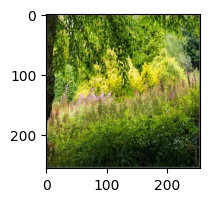

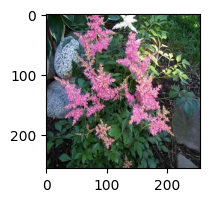

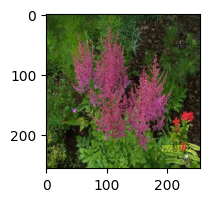

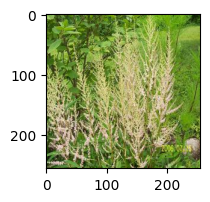

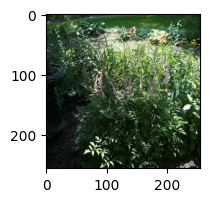

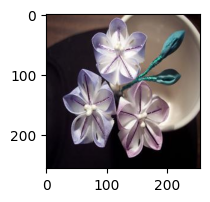

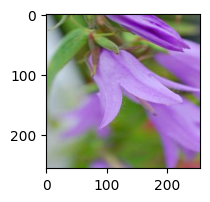

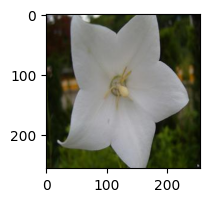

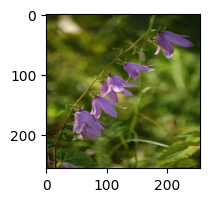

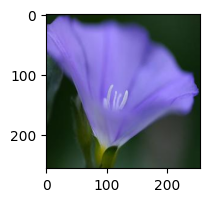

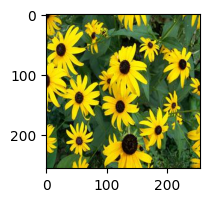

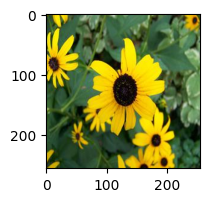

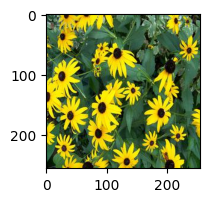

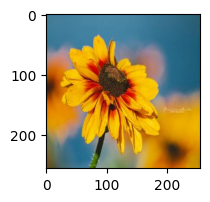

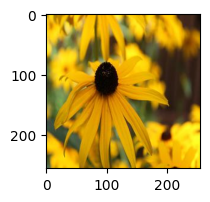

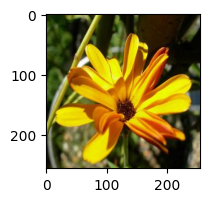

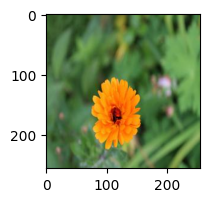

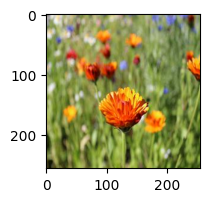

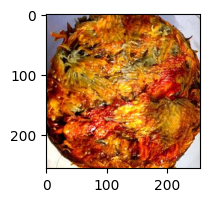

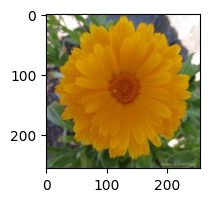

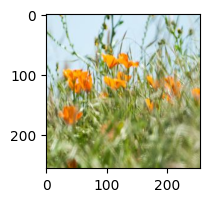

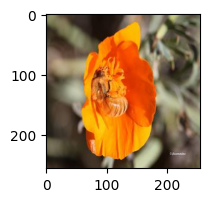

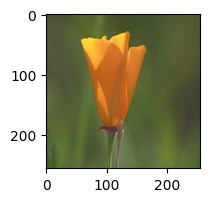

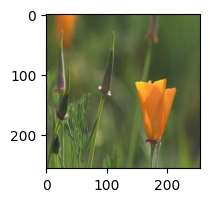

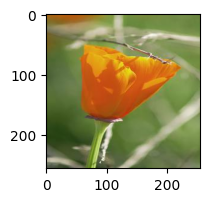

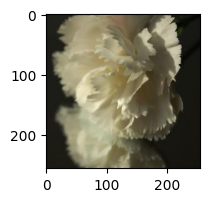

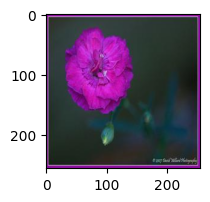

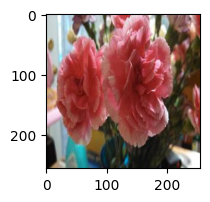

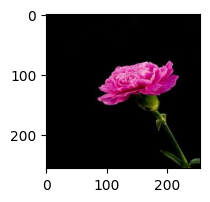

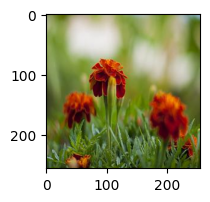

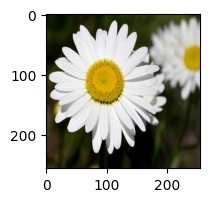

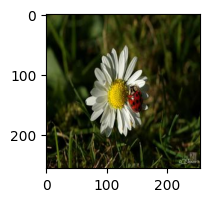

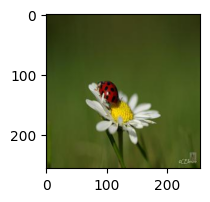

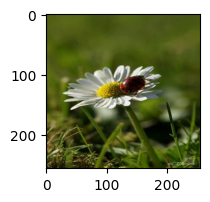

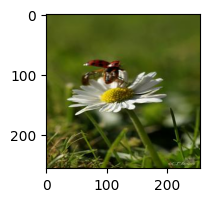

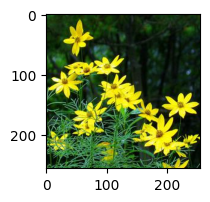

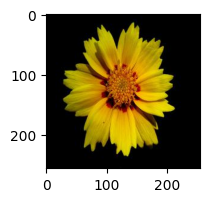

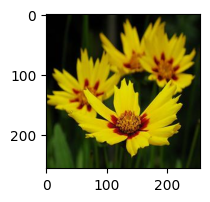

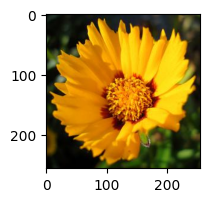

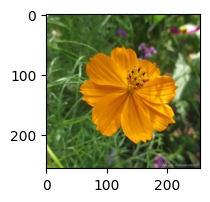

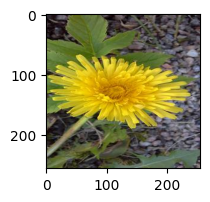

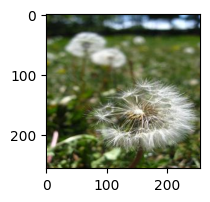

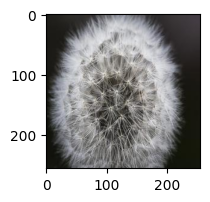

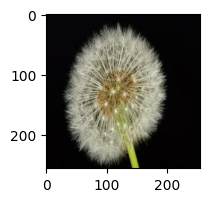

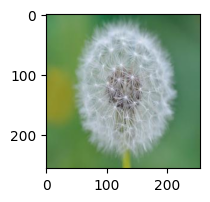

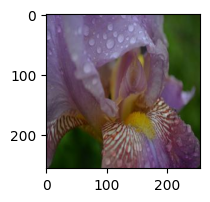

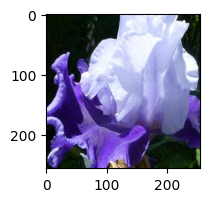

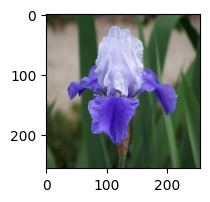

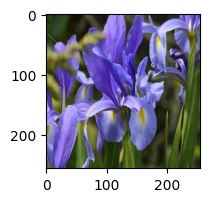

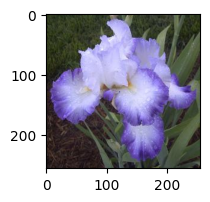

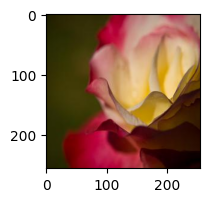

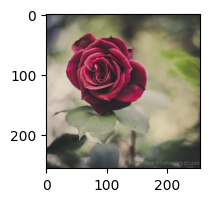

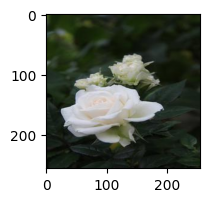

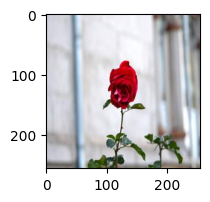

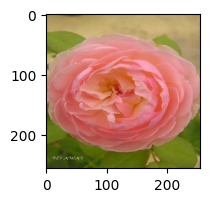

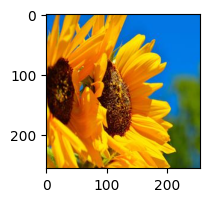

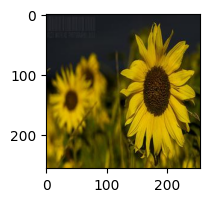

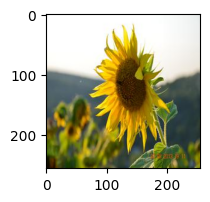

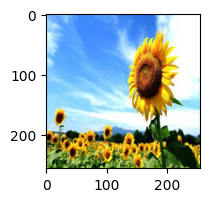

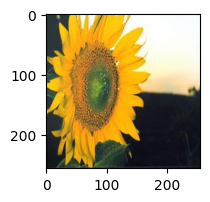

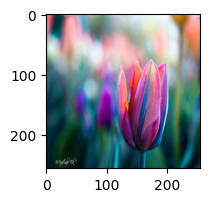

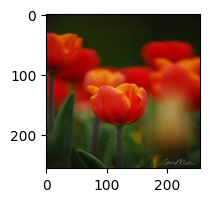

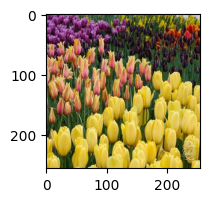

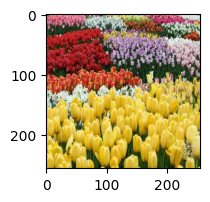

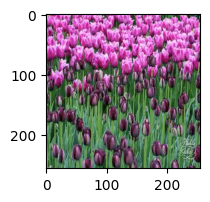

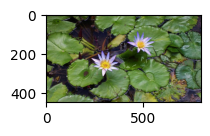

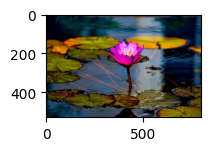

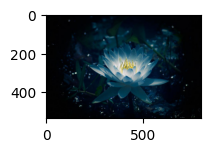

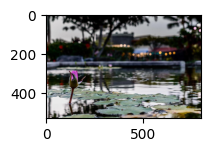

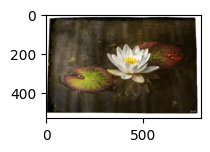

In [6]:
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    image_count = 0
    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path,file)
        plt.figure(figsize=(2, 2))
        plt.imshow(plt.imread(image_path))
        plt.show()
        image_count += 1
        if image_count == 5:
            break

In [7]:
class_labels = [entry for entry in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, entry))]


print("Class Labels:")
for label in class_labels:
    label_path = os.path.join(train_dir, label)
    num_contents = len(os.listdir(label_path))
    print(f"{label}: {num_contents} items")

Class Labels:
astilbe: 726 items
bellflower: 872 items
black_eyed_susan: 986 items
calendula: 1011 items
california_poppy: 1021 items
carnation: 924 items
common_daisy: 978 items
coreopsis: 1035 items
dandelion: 1038 items
iris: 1041 items
rose: 986 items
sunflower: 1013 items
tulip: 1034 items
water_lily: 977 items


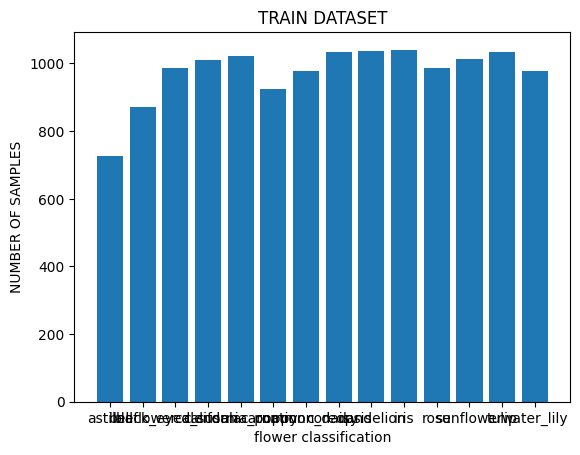

In [9]:
train_image_count_dict = {}

for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    train_image_count = 0
    for file in os.listdir(folder_path):
        train_image_count += 1
    train_image_count_dict[folder] = train_image_count
train_subfolders = list(train_image_count_dict.keys())
train_image_counts = list(train_image_count_dict.values())
plt.bar(train_subfolders, train_image_counts)
plt.xlabel('flower classification')
plt.ylabel('NUMBER OF SAMPLES')
plt.title('TRAIN DATASET')
plt.show()

In [10]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          width_shift_range = 20,
                                                          height_shift_range = 20,
                                                          rotation_range = 20,
                                                          horizontal_flip = True,
                                                          vertical_flip = True,
                                                          shear_range = 0.2,
                                                          zoom_range = 0.2)
data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [19]:
train_dataset = data_aug.flow_from_directory(train_dir,
                                            subset = 'training',
                                            target_size = (224,224),
                                            seed = 42,
                                            batch_size = 32)
val_dataset = data.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       batch_size = 32,
                                       seed = 42)
 

Found 13642 images belonging to 14 classes.
Found 98 images belonging to 14 classes.


In [13]:
img_size = (224,224)
img_shape = img_size + (3,)
mobilenet = tf.keras.applications.MobileNetV2(input_shape = img_shape,
                                            include_top = False,
                                            weights = 'imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [14]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [15]:
mobilenet.trainable = False
mobilenet.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128, 'relu'))
model.add(Dense(64, 'relu'))
model.add(Dense(14, 'softmax'))

In [17]:
model.compile(optimizer = 'Adam',
              loss = 'CategoricalCrossentropy',
             metrics = ['accuracy'])

In [20]:
model.fit(train_dataset, validation_data = val_dataset, epochs = 5)

C:\Users\USER\anaconda3\envs\Vision\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6606 - loss: 1.0830

C:\Users\USER\anaconda3\envs\Vision\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


427/427 ━━━━━━━━━━━━━━━━━━━━ 893s 2s/step - accuracy: 0.6608 - loss: 1.0822 - val_accuracy: 0.8265 - val_loss: 0.4873
Epoch 2/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 719s 2s/step - accuracy: 0.8475 - loss: 0.4622 - val_accuracy: 0.8980 - val_loss: 0.3377
Epoch 3/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.8742 - loss: 0.3870 - val_accuracy: 0.8367 - val_loss: 0.4427
Epoch 4/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 665s 2s/step - accuracy: 0.8931 - loss: 0.3292 - val_accuracy: 0.8367 - val_loss: 0.4353
Epoch 5/5
427/427 ━━━━━━━━━━━━━━━━━━━━ 649s 2s/step - accuracy: 0.8948 - loss: 0.3195 - val_accuracy: 0.8061 - val_loss: 0.5411


In [21]:
predictions = model.predict(val_dataset)
predicted_labels = np.argmax(predictions, axis = 1)
print(predicted_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
[11 11  8  4  5 10  3 11  9  9  8  7 11  9 11  9  3  1 10 13  2  4 13 13
 10 12 13  9  1 13  2 13  1 11  6  9  8 11 12 13 10  8  7 13 12  0  6  7
 13  7  1  7 13  4 12  3  9 13  4  4  5  2 13  6 11 12  8  3  5  0 10  7
  8  9  2  0 13  0  0  7  9  1 13  1 13 12 11  5  8  3  5  2  2  6  8 10
 13 11]


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


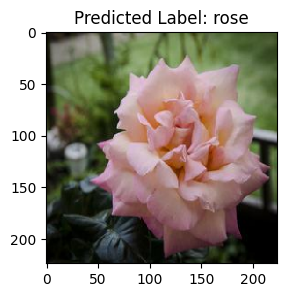

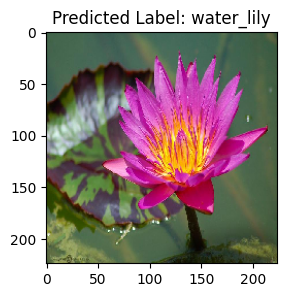

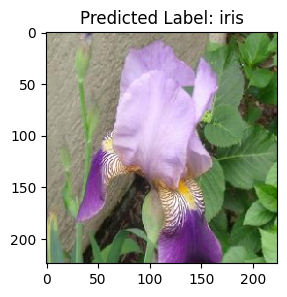

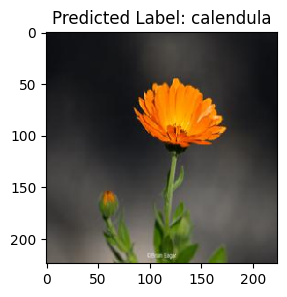

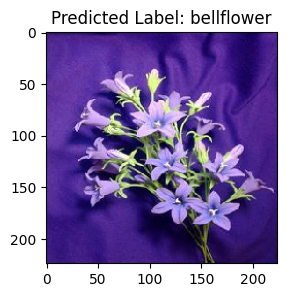

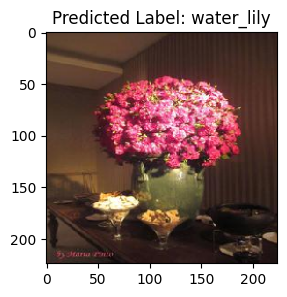

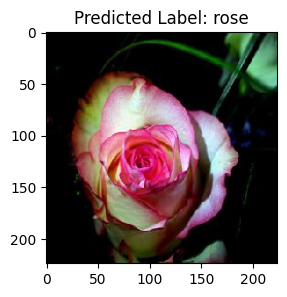

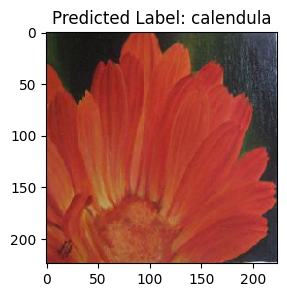

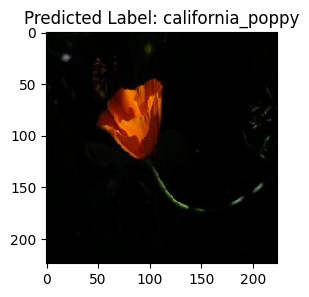

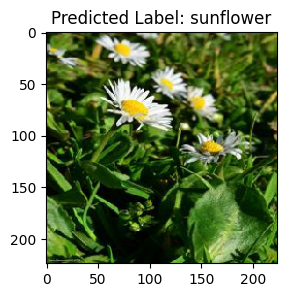

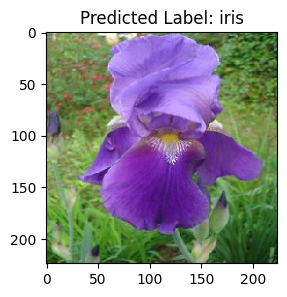

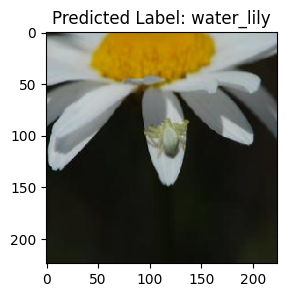

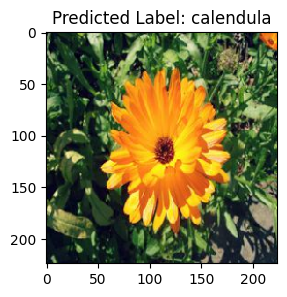

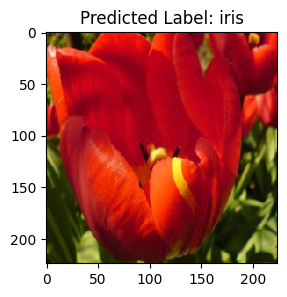

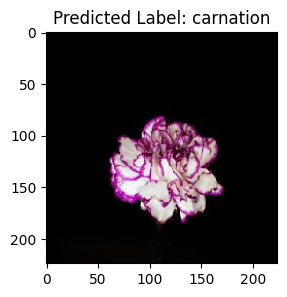

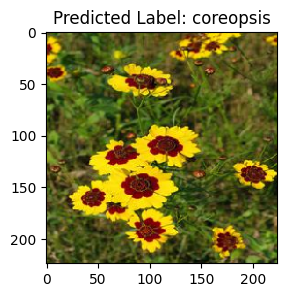

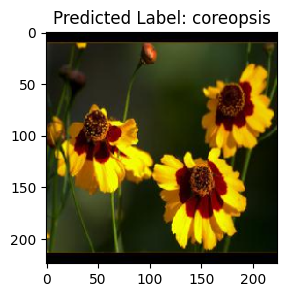

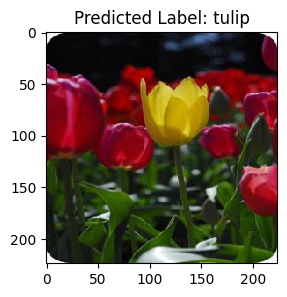

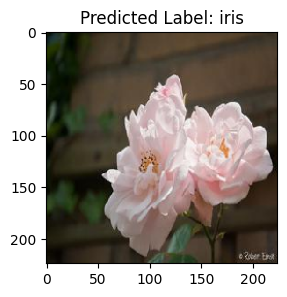

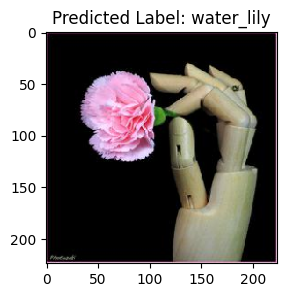

In [30]:
import os

class_labels = sorted(os.listdir(train_dir))

for images, labels in val_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    for i in range(min(20, len(images))):
        plt.figure(figsize=(3, 3))
        plt.imshow(images[i])
        
        predicted_label = class_labels[predicted_labels[i]]
        
        plt.title(f"Predicted Label: {predicted_label}")
        plt.show()

    break